In [1]:
import pandas as pd
import requests 
import io #File-related I/O operations i.e. file read/write

In [ ]:
url = "https://storage.googleapis.com/uber-data-engineering-project/uber_data.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text), sep=',')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

## Data Modeling

Breakdown data into fact and dimension tables.

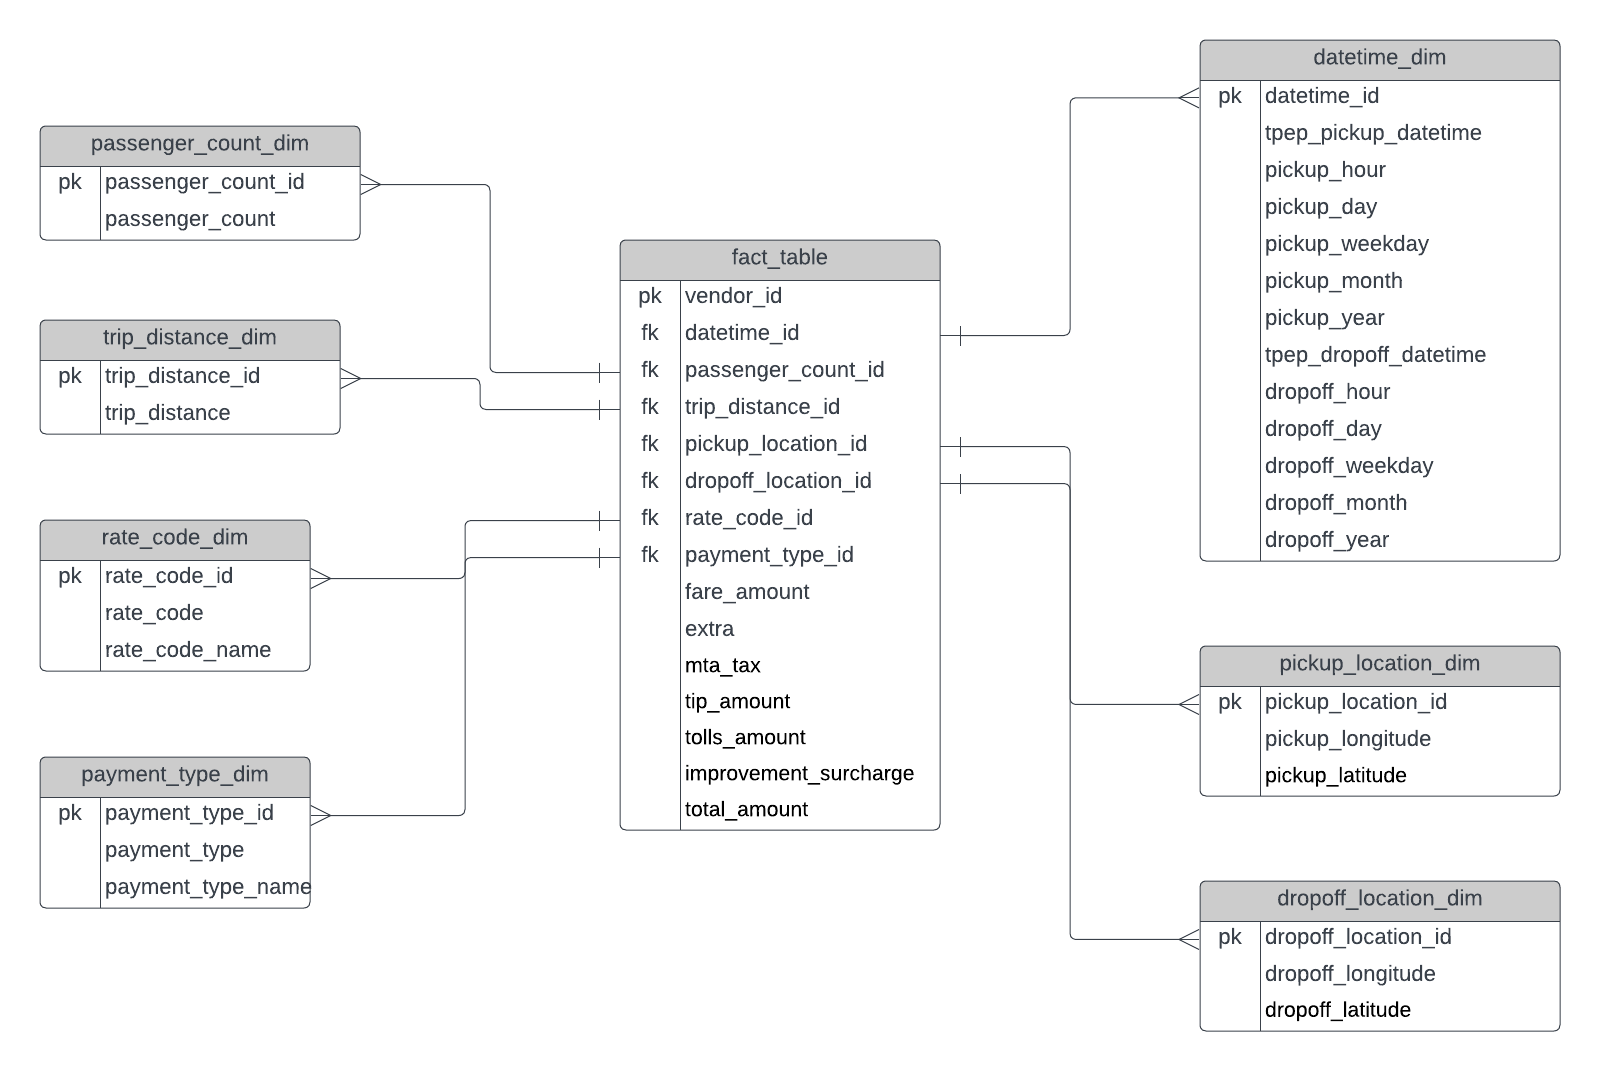

## Transformation

**1. Convert tpep_pickup_datetime and tpep_dropoff_datetime into datetime type**

Doing this allows us to break down datetime into elements i.e. hour, weekday, month, year

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 MB


**2. Remove duplicate and reset index**

In [ ]:
# Drop duplicate and reset index
df = df.drop_duplicates().reset_index(drop=True)

# Assign index to new column
df['trip_id'] = df.index

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

## Data Modeling

**1. Create datetime_dim table**

In [ ]:
# Create new columns for datetime elements
datetime_dim = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['pickup_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pickup_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pickup_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday
datetime_dim['pickup_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pickup_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['dropoff_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['dropoff_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['dropoff_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday
datetime_dim['dropoff_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['dropoff_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year

# Create new column 'datetime_id' as index 
datetime_dim['datetime_id'] = datetime_dim.index

# Shift 'datetime_id' column to first position
first_column = datetime_dim.pop('datetime_id')
datetime_dim.insert(loc=0, column='datetime_id', value=first_column)

In [ ]:
datetime_dim.head()

,datetime_id,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_hour,pickup_day,pickup_weekday,pickup_month,pickup_year,dropoff_hour,dropoff_day,dropoff_weekday,dropoff_month,dropoff_year
0,0,2016-03-01,2016-03-01 00:07:55,0,1,1,3,2016,0,1,1,3,2016
1,1,2016-03-01,2016-03-01 00:11:06,0,1,1,3,2016,0,1,1,3,2016
2,2,2016-03-01,2016-03-01 00:31:06,0,1,1,3,2016,0,1,1,3,2016
3,3,2016-03-01,2016-03-01 00:00:00,0,1,1,3,2016,0,1,1,3,2016
4,4,2016-03-01,2016-03-01 00:00:00,0,1,1,3,2016,0,1,1,3,2016


**2. Create passenger_count_dim table**

In [ ]:
# Create 'passenger_count_dim' table and reset index
passenger_count_dim = df[['passenger_count']].reset_index(drop=True)

# Create new column 'passenger_count_id' as index 
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index

# Rearrange columns by switching 'passenger_count_id' to first column
passenger_count_dim = passenger_count_dim[['passenger_count_id', 'passenger_count']]

passenger_count_dim.head()

,passenger_count_id,passenger_count
0,0,1
1,1,1
2,2,2
3,3,3
4,4,5


**3. Create trip_distance_dim table**

In [ ]:
# Create 'trip_distance_dim' table and reset index
trip_distance_dim = df[['trip_distance']].reset_index(drop=True)

# Create new column 'trip_distance_id' as index 
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index

# Rearrange columns by switching 'passenger_count_id' to first column
trip_distance_dim = trip_distance_dim[['trip_distance_id', 'trip_distance']]

trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


**4. Create pickup_location_dim table**

In [ ]:
# Create 'pickup_location_dim' table and reset index
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)

# Create new column 'pickup_location_id' as index 
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index

# Shift 'pickup_location_id' column to first position
first_column = pickup_location_dim.pop('pickup_location_id')
pickup_location_dim.insert(loc=0, column='pickup_location_id', value=first_column)


**5. Create dropoff_location_dim table**

In [ ]:
# Create 'dropoff_location_dim' table and reset index
dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)

# Create new column 'dropoff_location id' as index 
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index

# Rearrange columns by switching 'dropoff_location_id' to first column
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id', 'dropoff_longitude', 'dropoff_latitude']]

dropoff_location_dim.head()

,dropoff_location_id,dropoff_longitude,dropoff_latitude
0,0,-74.004265,40.746128
1,1,-74.005943,40.733166
2,2,-73.974541,40.675770
3,3,-73.969650,40.757767
4,4,-74.177170,40.695053


**6. Create rate_code_dim table**

In [ ]:
# Create 'rate_code_type' dictionary
rate_code_type = {
    1:'Standard rate',
    2:'JFK',
    3:'Newark',
    4:'Nassau or Westchester',
    5:'Negotiated fare',
    6:'Group ride'
}

# Create 'rate_code_dim' table and reset index
rate_code_dim = df[['RatecodeID']].reset_index(drop=True)

# Create new column 'dropoff_location id' as index 
rate_code_dim['rate_code_id'] = rate_code_dim.index

# Map 'rate_code_type' values to keys in 'RatecodeID'
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)

# Rearrange columns by switching 'rate_code_id' to first column
rate_code_dim = rate_code_dim[['rate_code_id', 'RatecodeID', 'rate_code_name']]

rate_code_dim.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


**7. Create payment_type_dim table**

In [ ]:
# Create 'payment_type_name' dictionary
payment_type_name = {
    1:'Credit card',
    2:'Cash',
    3:'No charge',
    4:'Dispute',
    5:'Unknown',
    6:'Voided trip'
}

# Create 'payment_type_dim' table and reset index
payment_type_dim = df[['payment_type']].reset_index(drop=True)

# Create new column 'payment_type_id id' as index 
payment_type_dim['payment_type_id'] = payment_type_dim.index

# Map 'payment_type_name' values to keys in 'payment_type'
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)

# Rearrange columns by switching 'dropoff_location_id' to first column
payment_type_dim = payment_type_dim[['payment_type_id', 'payment_type', 'payment_type_name']]

payment_type_dim.head()

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,1,Credit card
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card


**8. Create fact_table table**

In [ ]:
fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
                .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
                .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
                .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
                .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
                .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
                .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id') \
                [['trip_id', 'VendorID', 'datetime_id', 'passenger_count_id', 'trip_distance_id', 'pickup_location_id', 
                 'dropoff_location_id', 'rate_code_id', 'payment_type_id', 'fare_amount', 'extra',
                 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']]

fact_table.head()

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,pickup_location_id,dropoff_location_id,rate_code_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80
